In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pysr import PySRRegressor

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


## Importando os dados

In [4]:
grafeno = pd.read_csv('dados_RS/Neutral_Graphene_Oxide_Nanoflake_Dataset.csv')

##### Vamos trabalhar predizendo a relação entre a energia de Fermi e outras caracteristicas que o grafeno possui, e que estão presentes no banco de dados

In [5]:
grafeno = grafeno.select_dtypes(include=[np.number])

In [6]:
grafeno.fillna(grafeno.mean(), inplace=True)

In [7]:
for i in grafeno.columns:
    print(i)

charge_state
C
H
O
atom_number_total
C_concentration
H_concentration
O_concentration
avg_diameter
max_diameter
min_diameter
std_diameter
skew_diameter
kurt_diameter
anisotropy
area
AC_edge
ZZ_edge
total_edge
defects_count
defects_concentration
max_oop
mae_oop
std_oop
rmse_oop
residual_oop
ether_count
hydroxyl_count
carboxyl_count
edge_hydrogen_count
all_agent_group_count
ether_concentration
hydroxyl_concentration
carboxyl_concentration
def_local_ether_count
def_local_hydroxyl_count
def_local_carboxyl_count
def_local_other_count
max_bond_angle
max_bond_length
volume_per_atom
density_of_dangling_bonds
mass_density
particle_density
C-C:total_number
C-C:mean_value
C-C:error
C-C_sp1-sp1:total_number
C-C_sp1-sp1:mean_value
C-C_sp1-sp1:error
C-C_sp1-sp2:total_number
C-C_sp1-sp2:mean_value
C-C_sp1-sp2:error
C-C_sp1-sp3:total_number
C-C_sp1-sp3:mean_value
C-C_sp1-sp3:error
C-C_sp1-strained:total_number
C-C_sp1-strained:mean_value
C-C_sp1-strained:error
C-C_sp2-sp2:total_number
C-C_sp2-sp2:mean_

In [8]:
print(grafeno['electron_affinity'].apply(type).unique()) 

[<class 'float'>]


### Energia de Fermi

In [9]:
y = grafeno['Fermi_energy'].to_numpy()
X = grafeno[['total_energy', 'ionization_potential', 'electron_affinity', 'band_gap', 'electronegativity']].to_numpy()

In [10]:
model = PySRRegressor(
    maxsize=20,
    niterations=20,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
        "square",
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
)


In [11]:
model.fit(X, y)

c:\Users\isama\anaconda3\Lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
c:\Users\isama\anaconda3\Lib\site-packages\pysr\sr.py:2029: UserWarning: Note: you are running with more than 10,000 datapoints. You should consider turning on batching (https://astroautomata.com/PySR/options/#batching). You should also reconsider if you need that many datapoints. Unless you have a large amount of noise (in which case you should smooth your dataset first), generally < 10,000 datapoints is enough to find a functional form with symbolic regression. More datapoints will lower the search speed.
  warnings.warn(


Compiling Julia backend...


[ Info: Note: you are running with more than 10,000 datapoints. You should consider turning on batching (`options.batching`), and also if you need that many datapoints. Unless you have a large amount of noise (in which case you should smooth your dataset first), generally < 10,000 datapoints is enough to find a functional form.
[ Info: Started!



Expressions evaluated per second: 3.000e+03
Head worker occupation: 22.6%
Progress: 12 / 300 total iterations (4.000%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
2           1.131e+01  7.971e+00  y = inv(-0.62204)
3           1.894e-01  4.089e+00  y = -0.083527 + x₄
4           8.793e-02  7.674e-01  y = inv(-0.21329) + -0.27685
5           8.789e-02  4.879e-04  y = inv(-0.21329) + sin(-0.27685)
8           8.521e-02  1.032e-02  y = (-0.21329 * sin(x₁)) + inv(sin(-0.21329))
9           8.311e-02  2.493e-02  y = (-0.21329 * sin(x₁)) + inv(sin(sin(-0.21329)))
10          7.922e-02  4.794e-02  y = inv(sin(sin(-0.21329))) + (-0.21329 * square(sin(x₁)))
11          7.834e-02  1.115e-02  y = inv(sin(sin(sin(-0.21329)))) + (-0.21329 * square(sin(x₁))...
                                  )
12          7.552e-02  3.669e-02  y = inv(sin(-0.21329)) + sin((-0.21329 * square(sin(x₁))) * 

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                         0.64237595   
	1         1.022672                                   inv(-0.62203836)   
	2         4.857457                             -6.1716256 + 1.2142668   
	3         0.716579                               sin(x2) + -5.5697274   
	4         0.292986                        square(sin(x4)) + -5.825777   
	5         0.115239               -5.7594843 + square(square(sin(x4)))   
	6         0.272590          square(sin(-1.0652224 * x4)) + -5.6828246   
	7         0.049100  square(cos(square(cos(x4) + 0.28399667))) + -5...   
	8         0.062559  square(square(cos(cos(x4) + 0.20488113))) + in...   
	9   >>>>  0.212992  inv(-0.2139317) + (sin(square(cos(x4) + 0.2656...   
	10        0.001472  inv(-0.2139317) + (sin(square(cos(x4) + sin(0....   
	11        0.000442  inv(-0.2139317) + (sin(square(cos(x4) + sin(si...   
	12        0.008400  (inv(-0.20962858) + (inv(-0.7873031) * square(...   
	13        0.007653  (inv(-0.20962858) + ((square(cos(x4)) * cos(co...   
	14        0.024353  (inv(-0.20962858) + sin((square(cos(x4)) * cos...   
	15        0.000765  (inv(-0.20962858) + ((cos(cos(x1)) * square(co...   
	16        0.001018  (inv(-0.20962858) + ((cos(cos(x1)) * square(co...   
	
	         loss  complexity  
	0   31.444824           1  
	1   11.308590           2  
	2    0.087870           3  
	3    0.042918           4  
	4    0.032018           5  
	5    0.028533           6  
	6    0.021725           7  
	7    0.019693           9  
	8    0.018499          10  
	9    0.014950          11  
	10   0.014928          12  
	11   0.014921          13  
	12   0.014550          16  
	13   0.014439          17  
	14   0.014092          18  
	15   0.014081          19  
	16   0.014067          20  
]

In [12]:
print(model.get_best())

complexity                                                      11
loss                                                       0.01495
score                                                     0.212992
equation         inv(-0.2139317) + (sin(square(cos(x4) + 0.2656...
sympy_format     sin((cos(x4) + 0.26567212)**2)*(-1.0623627) - ...
lambda_format    PySRFunction(X=>sin((cos(x4) + 0.26567212)**2)...
Name: 9, dtype: object


In [35]:
model.get_best()['equation']

'inv(-0.2139317) + (sin(square(cos(x4) + 0.26567212)) * -1.0623627)'

In [25]:
from sklearn.metrics import root_mean_squared_error
RMSE = mean_squared_error(y,model.predict(X), squared=False)

c:\Users\isama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [26]:
print(RMSE)

0.1222704381679164


In [36]:
RMSE = mean_squared_error(y,model.predict(X), squared=False)

def plot_real_vs_pred(y_true, y_pred, title="Regressão Simbólica",):
    """
    Plota um gráfico de dispersão comparando os valores reais com os previstos.

    Parâmetros:
        y_true (array-like): Valores reais.
        y_pred (array-like): Valores previstos.
        title (str): Título do gráfico.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.7, color='orange', label = f'RMSE:{RMSE:.3f} eV' )
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r', label="Linha Ideal (y = x)")
    plt.xlabel("Valor Real")
    plt.ylabel("Valor Previsto")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.savefig("RS_Teste_oficial_RMSE_0_122")
    plt.tight_layout()
    plt.show()

c:\Users\isama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


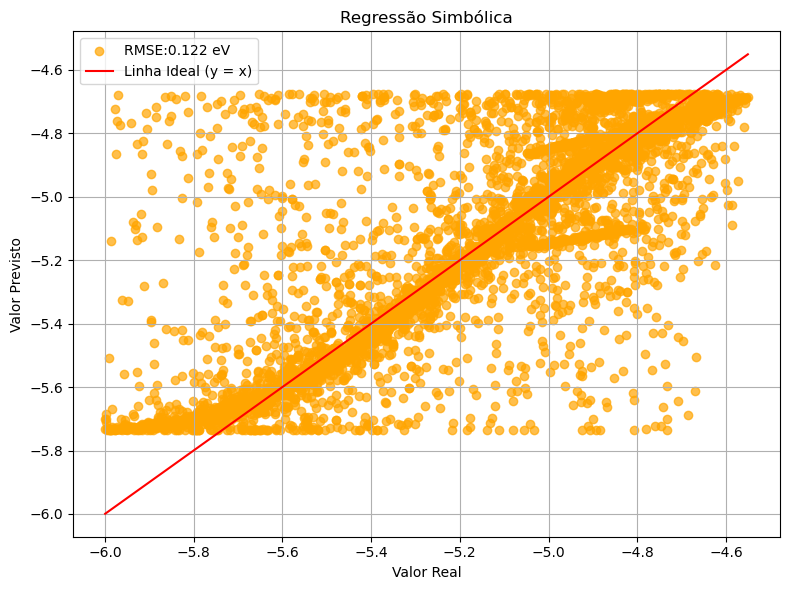

In [37]:
y_pred = model.predict(X)
plot_real_vs_pred(y, y_pred)

### Com mais iterações

In [38]:
model = PySRRegressor(
    maxsize=20,
    niterations=200,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
        "square",
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
)


In [39]:
model.fit(X, y)

c:\Users\isama\anaconda3\Lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
c:\Users\isama\anaconda3\Lib\site-packages\pysr\sr.py:2029: UserWarning: Note: you are running with more than 10,000 datapoints. You should consider turning on batching (https://astroautomata.com/PySR/options/#batching). You should also reconsider if you need that many datapoints. Unless you have a large amount of noise (in which case you should smooth your dataset first), generally < 10,000 datapoints is enough to find a functional form with symbolic regression. More datapoints will lower the search speed.
  warnings.warn(
[ Info: Note: you are running with more than 10,000 datapoints. You should consider turning on batching (`options.batching`), and also if you need that many datapoints. Unless you have a large amount of noise (in which case you should smooth your dataset first), generally < 10,000 datapoints is


Expressions evaluated per second: 5.490e+03
Head worker occupation: 2.3%
Progress: 16 / 3000 total iterations (0.533%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           8.670e-01  1.594e+01  y = x₂
2           8.465e-01  2.401e-02  y = inv(-0.24472)
3           2.002e-01  1.442e+00  y = x₄ + 0.018596
4           1.967e-01  1.776e-02  y = exp(x₀) + x₄
6           1.581e-01  1.094e-01  y = x₄ * exp(sin(exp(x₂)))
7           1.341e-01  1.645e-01  y = exp(sin(sin(exp(x₂)))) * x₄
8           8.804e-02  4.206e-01  y = inv(-0.15543) + inv(cos(sin(cos(-0.15543))))
9           7.812e-02  1.196e-01  y = inv(-0.15543) + inv(sin(sin(cos(cos(x₁)))))
10          3.656e-02  7.592e-01  y = (-0.8453 + sin(x₄ + cos(sin(x₃)))) + x₄
13          2.859e-02  8.196e-02  y = (exp(0.21299) * (-0.8453 + sin(x₄ + cos(sin(x₃))))) + x₄
15          2.390e-02  8.964e-02  y = inv(cos(square(cos((0.351

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                                 x4   
	1         0.426692                                   inv(-0.19384952)   
	2         0.379190                            -2.4419289 + -2.5154307   
	3         0.716579                                -5.569708 + sin(x2)   
	4         0.292986                       -5.8257766 + square(sin(x4))   
	5         0.115239                square(square(sin(x4))) + -5.759477   
	6         0.461165            square(cos(x4 * 1.3685769)) + -5.689302   
	7         0.021582      square(cos(cos(x4) + 0.28316697)) + -5.715827   
	8         0.119762  cos((cos(x4) + 0.2819912) * 1.3443025) + -5.71...   
	9   >>>>  0.174594  -5.678126 + square(cos(cos(x3 * 0.6735897) + x1))   
	10        0.040396  -5.6642866 + square(cos(sin(sin(x3 + 1.0151936...   
	11        0.054071  square(cos((sin(x3 + 0.9881793) * 0.8125062) +...   
	12        0.000009  square(cos((sin(x3 + cos(-0.15789585)) * 0.812...   
	13        0.000483  square(cos(((sin(x3 + 0.9974923) * 0.8125062) ...   
	14        0.017936  square(cos((0.8125062 * sin(inv(cos(exp(x2))) ...   
	15        0.012432  square(cos((sin(x3 + cos(square(square(sin(x2)...   
	16        0.007127  -5.6642866 + square(cos(x1 + (sin(cos(cos(x1))...   
	17        0.023451  -5.6642866 + square(cos((sin(cos(exp(x1))) * s...   
	18        0.001133  -5.6642866 + square(cos((sin(cos(sin(exp(x1)))...   
	19        0.002236  -5.6642866 + square(cos((sin(cos(exp(x1))) * s...   
	
	        loss  complexity  
	0   0.196712           1  
	1   0.128387           2  
	2   0.087870           3  
	3   0.042918           4  
	4   0.032018           5  
	5   0.028533           6  
	6   0.017991           7  
	7   0.017607           8  
	8   0.015620           9  
	9   0.013118          10  
	10  0.012598          11  
	11  0.011935          12  
	12  0.011935          13  
	13  0.011929          14  
	14  0.011717          15  
	15  0.011572          16  
	16  0.011490          17  
	17  0.011224          18  
	18  0.011211          19  
	19  0.011186          20  
]

In [ ]:
model.get_best()['equation']


'-5.678126 + square(cos(cos(x3 * 0.6735897) + x1))'

In [42]:
RMSE_2 = mean_squared_error(y,model.predict(X), squared=False)

c:\Users\isama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [43]:
print(RMSE_2)

0.11453199470268226


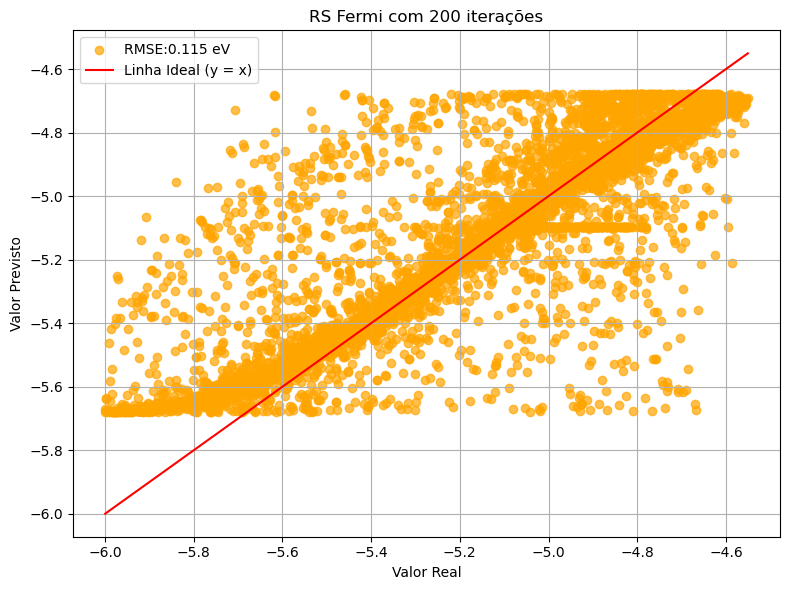

In [46]:
y_pred = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.7, color='orange', label = f'RMSE:{RMSE_2:.3f} eV' )
plt.plot([min(y), max(y)], [min(y), max(y)], 'r', label="Linha Ideal (y = x)")
plt.xlabel("Valor Real")
plt.ylabel("Valor Previsto")
plt.title("RS Fermi com 200 iterações")
plt.legend()
plt.grid(True)
plt.savefig("RS_Teste_oficial_RMSE_0_114")
plt.tight_layout()
plt.show()

#### Mudando os hiperparâmetros de Unary operators

In [47]:
model = PySRRegressor(
    maxsize=20,
    niterations=20,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
        "square",
        "sqrt",
        "cube",
        "sign",
        "neg(x) = -x",
        "tan",
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
)


In [48]:
model.fit(X, y)

c:\Users\isama\anaconda3\Lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
c:\Users\isama\anaconda3\Lib\site-packages\pysr\sr.py:2029: UserWarning: Note: you are running with more than 10,000 datapoints. You should consider turning on batching (https://astroautomata.com/PySR/options/#batching). You should also reconsider if you need that many datapoints. Unless you have a large amount of noise (in which case you should smooth your dataset first), generally < 10,000 datapoints is enough to find a functional form with symbolic regression. More datapoints will lower the search speed.
  warnings.warn(


ValueError: Custom function neg is not defined in `extra_sympy_mappings`. You can define it with, e.g., `model.set_params(extra_sympy_mappings={'inv': lambda x: 1/x})`, where `lambda x: 1/x` is a valid SymPy function defining the operator. You can also define these at initialization time.

### Energia por átomo